In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant

C:\Users\aidan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_combined = pd.read_excel(r'Stock.xlsx' , sheet_name = 'combined')

In [3]:
df_combined = df_combined.fillna(0)
df_combined.head()

,Date,MSFT,MSFT%chng,Tesla,Tesla%chng,Apple,Apple%chng,SP500,SP500%chng
0,2018-01-02,86.129997,0.000000,20.799999,0.000000,42.540001,0.000000,2683.73,0.000000
1,2018-01-03,86.059998,-0.000813,21.400000,0.028846,43.132500,0.013928,2697.85,0.005234
2,2018-01-04,86.589996,0.006158,20.858000,-0.025327,43.134998,0.000058,2719.31,0.007892
3,2018-01-05,87.660004,0.012357,21.108000,0.011986,43.360001,0.005216,2731.33,0.004401
4,2018-01-08,88.199997,0.006160,21.066668,-0.001958,43.587502,0.005247,2742.67,0.004135


In [4]:
stock_names = ['MSFT', 'Tesla', 'Apple']

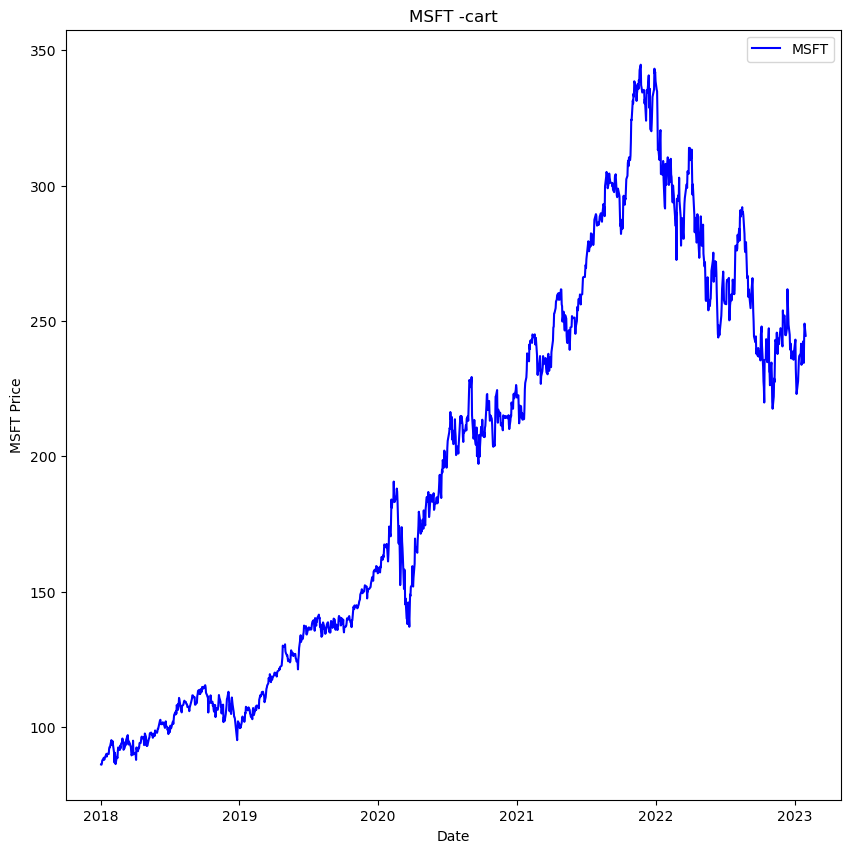

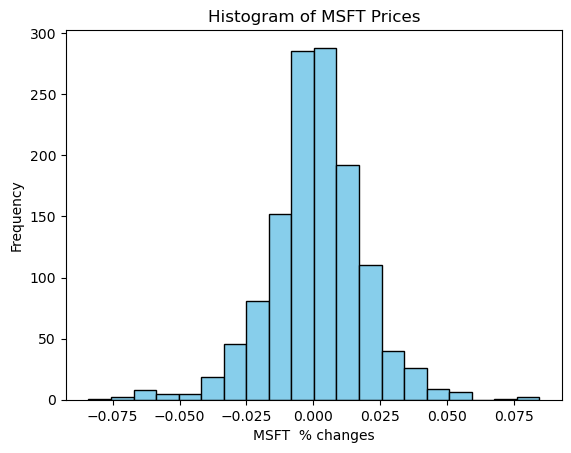

Descriptive stats of MSFT:
count    1278.000000
mean      194.470900
std        74.232396
min        86.059998
25%       120.209999
50%       203.580002
75%       255.482506
max       344.619995
Name: MSFT, dtype: float64


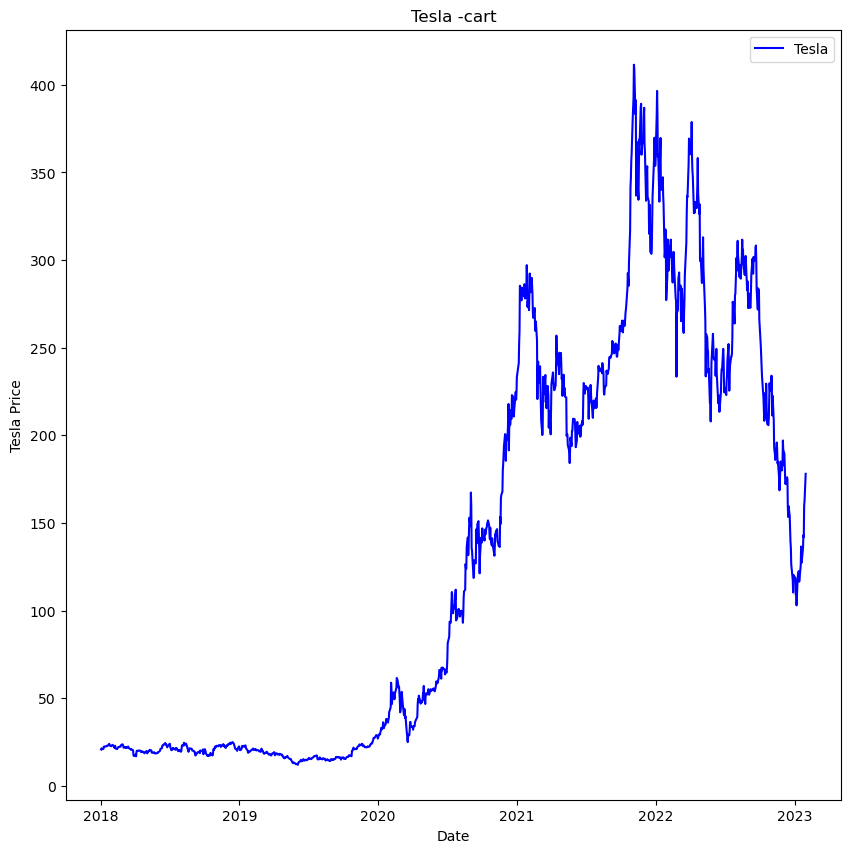

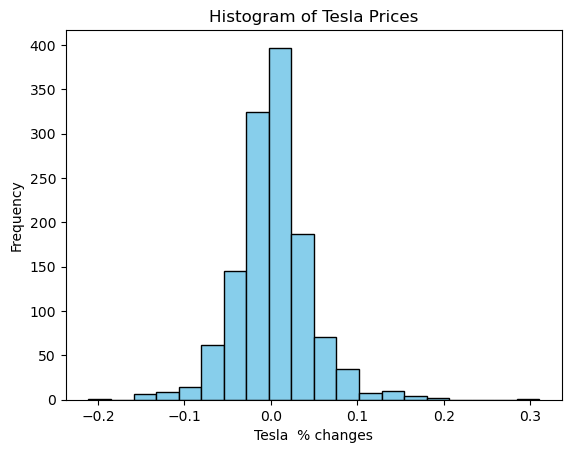

Descriptive stats of Tesla:
count    1278.000000
mean      131.895211
std       117.166580
min        12.073333
25%        21.088166
50%        96.573334
75%       234.916672
max       411.470001
Name: Tesla, dtype: float64


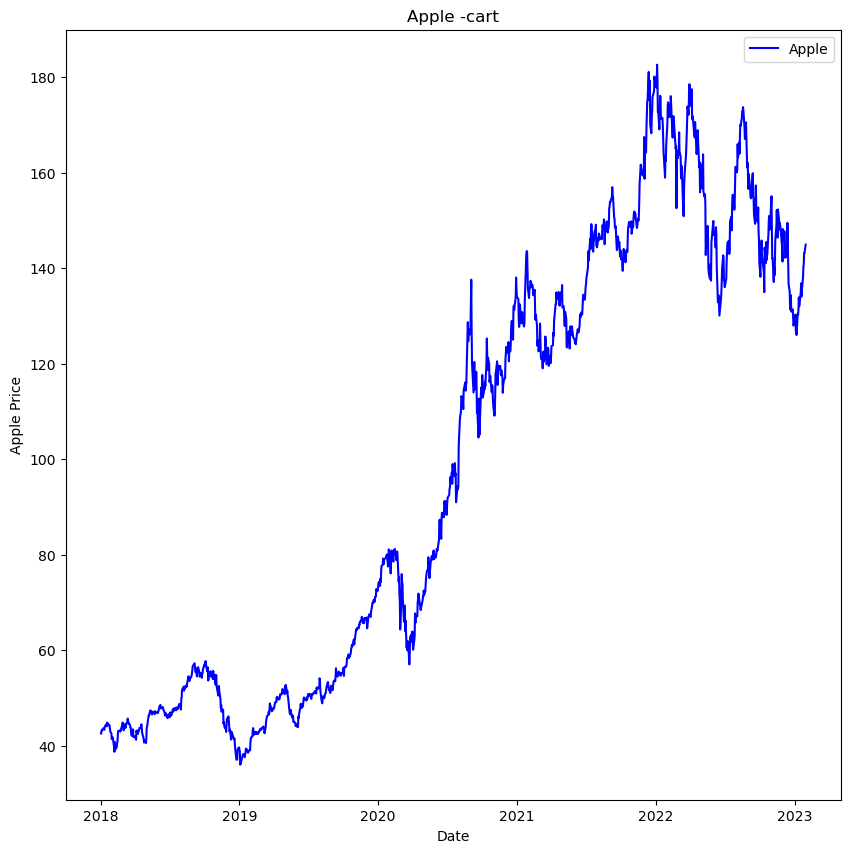

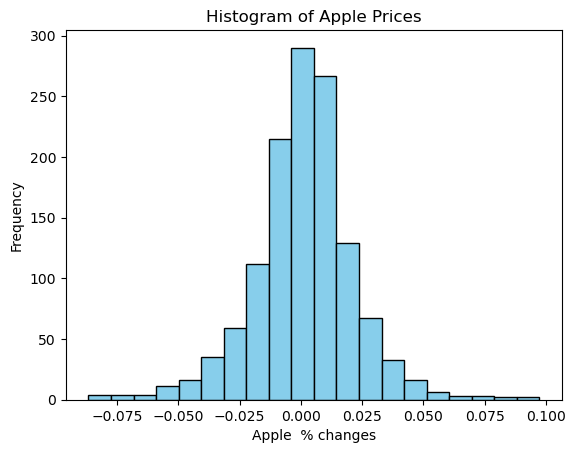

Descriptive stats of Apple:
count    1278.000000
mean       98.574104
std        46.176136
min        35.994999
25%        51.070625
50%        95.087497
75%       142.699997
max       182.630005
Name: Apple, dtype: float64


In [8]:
for stock in stock_names:
    plt.figure(figsize=(10,10))
    plt.plot(df_combined['Date'] , df_combined[stock] , label = stock, color ='blue')
    plt.xlabel('Date')
    plt.ylabel(f'{stock} Price')
    plt.title(f'{stock} -cart')
    plt.legend()
    plt.show()
    
    plt.hist(df_combined[stock + '%chng'], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(f'{stock}  % changes')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {stock} Prices')
    plt.show()
    
    print(f'Descriptive stats of {stock}:')
    print(df_combined[stock].describe())

In [6]:
for stock in stock_names:
    Y = df_combined[stock + '%chng']
    X = sm.tools.add_constant(df_combined['SP500%chng'])
    model = sm.OLS(Y, X)
    results = model.fit()
    print(f"Regression Results for {stock}:")
    print(results.summary())
    print()

    beta = results.params['SP500%chng']
    print(f"Beta for {stock}: {beta}")
    print("=" * 30)

Regression Results for MSFT:
                            OLS Regression Results                            
Dep. Variable:              MSFT%chng   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1941.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.72e-258
Time:                        17:01:04   Log-Likelihood:                 3911.5
No. Observations:                1278   AIC:                            -7819.
Df Residuals:                    1276   BIC:                            -7809.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007  

## Analysis

Comparing the Beta coefficients for Microsoft (MSFT), Tesla (TSLA), and Apple (AAPL) provides insights into the relative volatility and riskiness of these stocks compared to the broader market, typically represented by the S&P 500 index. Here's the analysis:

Beta Values:
        Microsoft (MSFT): 1.2139
        Tesla (TSLA): 1.8178
        Apple (AAPL): 1.3292

Interpretation:
        TSLA has the highest Beta value (1.8178), indicating that its stock is the most volatile among the three compared to the               market. Investors in TSLA can expect larger swings in returns compared to the overall market.
        AAPL follows with a Beta of 1.3292, signifying moderate volatility. While still more volatile than the market, AAPL's                 stock is relatively less volatile compared to TSLA.
        MSFT has the lowest Beta value (1.2139) among the three, indicating relatively lower volatility compared to TSLA and                   AAPL. However, it is still more volatile than the overall market.

Risk Assessment:
        TSLA's higher Beta implies higher market risk. Investors in TSLA should be prepared for larger fluctuations in returns,            both positive and negative, compared to the broader market.
        AAPL also presents moderate market risk, offering a balance between potential returns and volatility.
        MSFT, with the lowest Beta, carries relatively lower market risk compared to TSLA and AAPL. However, it's essential to              note that it is still more volatile than the overall market.

Investment Implications:
        Investors seeking higher potential returns and are willing to accept higher risk may consider investing in TSLA, which              offers the highest Beta and potential for higher returns.
        AAPL may be suitable for investors seeking moderate returns with moderate risk exposure.
        MSFT, with the lowest Beta, may appeal to more conservative investors looking for stability with some exposure to market            growth.

Diversification:
        Combining stocks with different Beta values in a diversified portfolio can help mitigate overall portfolio risk.                 Investors can balance the risk-return tradeoff by allocating investments across assets with varying levels of Beta.

Long-Term Considerations:
        While Beta provides insights into short-term volatility, investors should consider the long-term fundamentals, growth           prospects, and competitive positioning of each company when making investment decisions.

In summary, analyzing Beta values helps investors assess the risk-return tradeoff and tailor their investment strategies according to their risk tolerance, investment objectives, and portfolio diversification needs.